Krzysztof Swędzioł 418001 MOWNiT lab6

In [25]:
using Polynomials,SpecialPolynomials,Plots,LinearAlgebra,CSV,DataFrames,Statistics

Zadanie 1

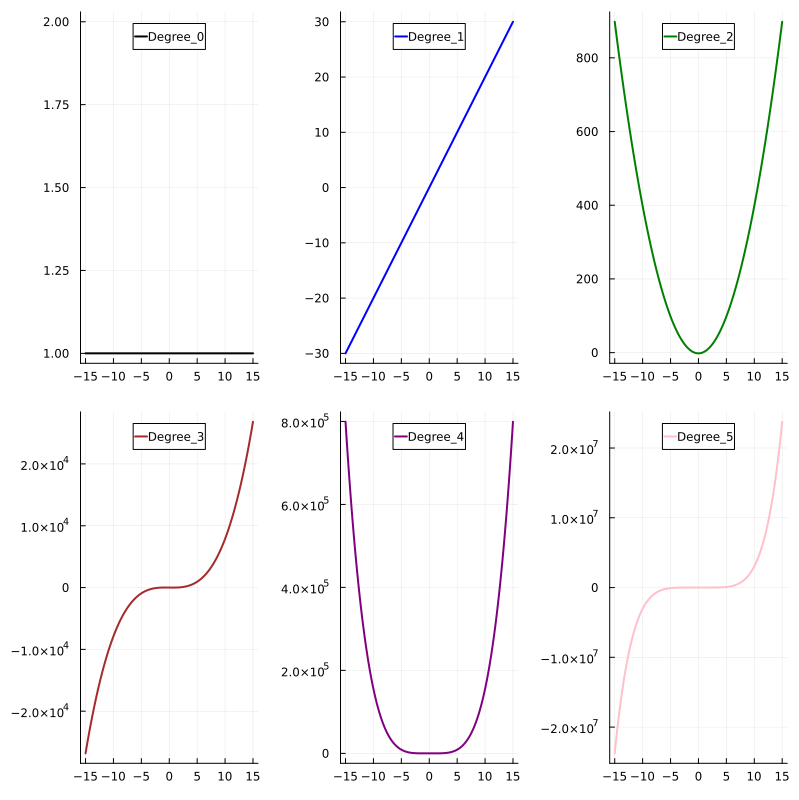

In [4]:
xs = -15:0.1:15
h0 = basis(Hermite,0)
h1 = basis(Hermite,1)
h2 = basis(Hermite,2)
h3 = basis(Hermite,3)
h4 = basis(Hermite,4)
h5 = basis(Hermite,5)
ys0 = [h0(x) for x in xs]
ys1 = [h1(x) for x in xs]
ys2 = [h2(x) for x in xs]
ys3 = [h3(x) for x in xs]
ys4 = [h4(x) for x in xs]
ys5 = [h5(x) for x in xs]
plot(
    size = (800,800),
    xs,
    [ys0,ys1,ys2,ys3,ys4,ys5],
    linewidth=2,
    layout=grid(2,3),
    color = [:black :blue :green :brown :purple :pink],
    legend_position = :top,
    label = ["Degree_0" "Degree_1" "Degree_2" "Degree_3" "Degree_4" "Degree_5"]
)

Zadanie 2

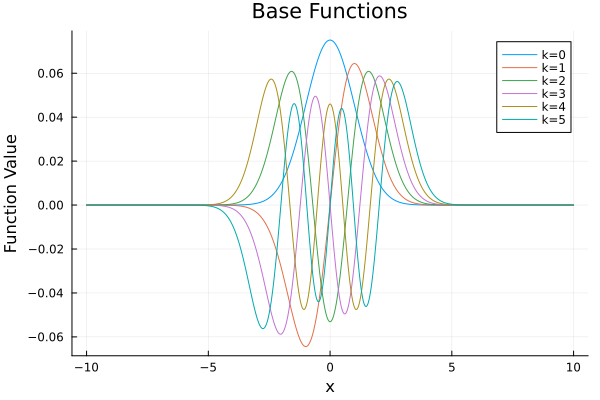

In [6]:
function base_fun(k, x, norm=true)
    value_arr = basis(Hermite, k).(x)
    app = value_arr .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end
xs = -10:0.01:10
ys0 = base_fun(0,xs)
ys1 = base_fun(1, xs)
ys2 = base_fun(2, xs)
ys3 = base_fun(3, xs)
ys4 = base_fun(4, xs)
ys5 = base_fun(5, xs)

plot(xs, ys0, label="k=0", title="Base Functions", xlabel="x", ylabel="Function Value")
plot!(xs, ys1, label="k=1")
plot!(xs, ys2, label="k=2")
plot!(xs, ys3, label="k=3")
plot!(xs, ys4, label="k=4")
plot!(xs, ys5, label="k=5")



Zadanie 3

Wielomiany ortogonalne mają pewną charakterystykę po której można poznać że spełniają ten właśnie warunek - W macierzy dla wektorów znormalizowanych wartości są symetryczne a po przekątnej są jedynki. Sprawdźmy zatem te macierze bez i z wagą : 

In [21]:
function base_fun(k, x, norm=true)
    value_arr = basis(Hermite, k).(x)
    app = value_arr .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end


xs = -3:0.1:3

ys0 = base_fun(0,xs)
ys1 = base_fun(1, xs)
ys2 = base_fun(2, xs)
ys3 = base_fun(3, xs)
ys4 = base_fun(4, xs)
ys5 = base_fun(5, xs)

b0 = [h0(x) for x in xs]
b1 = [h1(x) for x in xs]
b2 = [h2(x) for x in xs]
b3 = [h3(x) for x in xs]
b4 = [h4(x) for x in xs]
b5 = [h5(x) for x in xs]


without_wage = Array{Float64, 2}(undef, 6, 6);  
for (i, b_i) in enumerate([b0, b1, b2, b3, b4, b5]) 
    for (j, b_j) in enumerate([b0, b1, b2, b3, b4, b5])
        without_wage[i,j] = dot(b_i, b_j)
    end
end

with_wage = Array{Float64, 2}(undef, 6, 6);
for (i, ys_i) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5]) 
    for (j, ys_j) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5])
        with_wage[i,j] = dot(ys_i, ys_j)
    end
end
without_wage


6×6 Matrix{Float64}:
   61.0              7.99361e-15  …  8532.0          -3.18323e-12
    7.99361e-15    756.4               -2.72848e-12   1.55967e5
  634.4             -5.68434e-14        2.3761e5      1.30967e-10
   -1.13687e-13  12338.4               -1.74623e-10   4.06607e6
 8532.0             -2.72848e-12        4.82303e6    -4.65661e-10
   -3.18323e-12      1.55967e5    …    -4.65661e-10   7.08112e7

In [22]:
with_wage

6×6 Matrix{Float64}:
  1.0           1.20783e-17  -0.0002194    …  -0.00102464   -1.95916e-18
  1.20783e-17   1.0           1.56772e-17     -1.59676e-17  -0.00793284
 -0.0002194     1.56772e-17   1.0             -0.0145396    -6.22735e-18
 -2.37014e-18  -0.0023814     3.00817e-17     -4.43762e-17  -0.0600334
 -0.00102464   -1.59676e-17  -0.0145396        1.0           4.23589e-17
 -1.95916e-18  -0.00793284   -6.22735e-18  …   4.23589e-17   1.0

Widzimy zatem iż dla wektorów znormalizowanych macierz jest symetryczna z wartością 1 na przekątnej. Zatem są one wektorami ortonormalnymi.

Zadanie 4

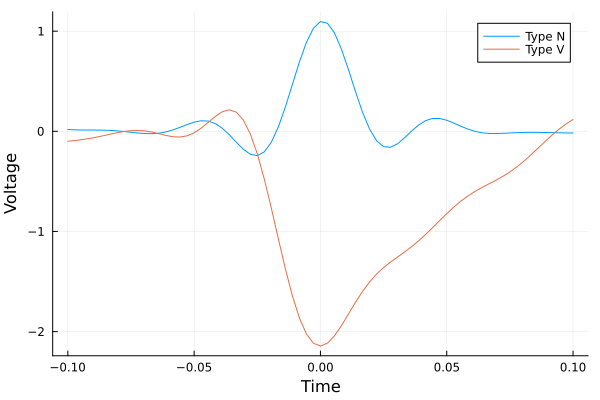

In [6]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
plot(ekg_data.time, ekg_data.signalN, label="Type N", xlabel = "Time", ylabel="Voltage")
plot!(ekg_data.time, ekg_data.signalV, label="Type V")

A) Aproksymacja QRS typu V

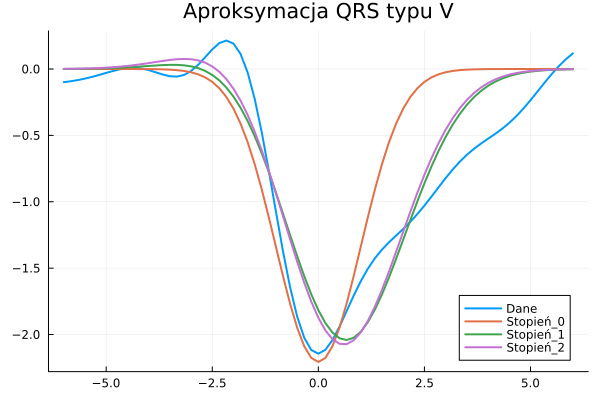

In [11]:
function base_fun(k, x, norm=true)
    value_arr = basis(Hermite, k).(x)
    app = value_arr .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end

yVal_ekgV = ekg_data.signalV
xVal_ekg = ekg_data.time*60

ys0 = base_fun(0,xVal_ekg)
ys1 = base_fun(1, xVal_ekg)
ys2 = base_fun(2, xVal_ekg)

factor0 = dot(yVal_ekgV, ys0)
factor1 = dot(yVal_ekgV, ys1)
factor2 = dot(yVal_ekgV, ys2)

approx0 = factor0 * ys0
approx1 = factor1 * ys1
approx2 = factor2 * ys2

approx01 = V0 + V1
approx012 = V01 + V2

plot(
    xVal_ekg, 
    [yVal_ekgV,approx0,approx01,approx012],
    label=["Dane" "Stopień_0" "Stopień_1" "Stopień_2" "Stopień_3"],
    linewidth=2,
    title="Aproksymacja QRS typu V"
)

B) Aproksymacja QRS typu N

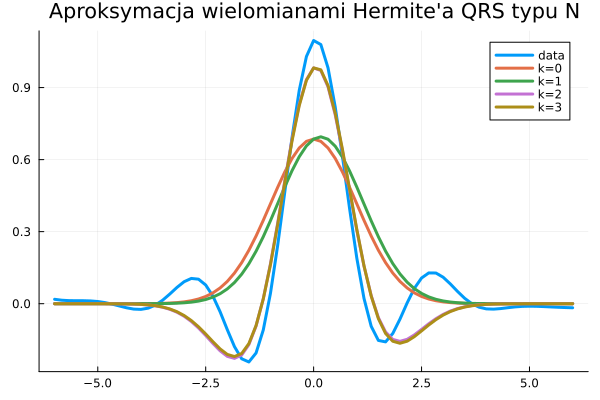

In [17]:
yVal_ekgN = ekg_data.signalN
n = length(xVal_ekg)

approx = [zeros(n) for _ in 0:30]
for i in 0:15
    y = base_fun(i,xVal_ekg)
    factor = dot(yVal_ekgN,y)
    res = factor * y
    approx[i+1] = res
end
approx[12] = approx[1] + approx[2]
for i in 3:11
    approx[i+10] = approx[i] + approx[i+9]
end
plot(
    xVal_ekg, 
    [yVal_ekgN,approx[1],approx[12],approx[13],approx[14]],
    label=["data" "k=0" "k=1" "k=2" "k=3"],
    linewidth=3,
    title="Aproksymacja wielomianami Hermite'a QRS typu N"
)

Zadanie 5

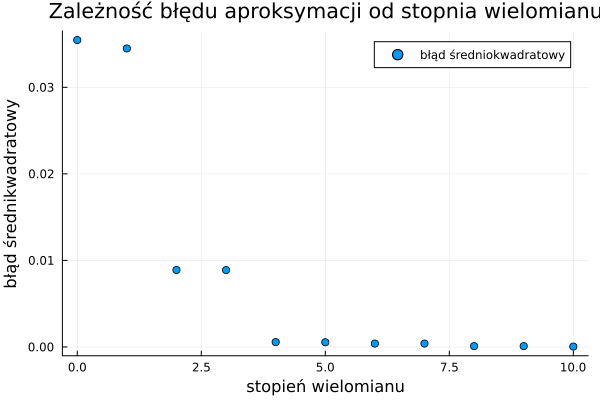

In [31]:
yVal_ekgN = ekg_data.signalN  
xVal_ekg = ekg_data.time * 60  

function base_fun(k, x, norm=true)
    value_arr = basis(Hermite, k).(x)
    app = value_arr .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end

yVal_ekgN = ekg_data.signalN
n = length(xVal_ekg)

approx = [zeros(n) for _ in 0:30]
for i in 0:15
    y = base_fun(i,xVal_ekg)
    factor = dot(yVal_ekgN,y)
    res = factor * y
    approx[i+1] = res
end

approx[12] = approx[1] + approx[2]

for i in 3:11
    approx[i+10] = approx[i] + approx[i+9]
end

Errors = zeros(0)
AverageError(y1, y2) = mean((y1-y2).^2)

append!(Errors,AverageError(yy_ekgN,approx[1]))
for i in 12:21
    append!(Errors,AverageError(yy_ekgN,approx[i]))
end
scatter( 
    0:1:10,
    Errors,
    xlabel="stopień wielomianu",
    ylabel="błąd średnikwadratowy",
    label="błąd średniokwadratowy",
    title="Zależność błędu aproksymacji od stopnia wielomianu"
)

In [ ]:
Jak widać, wraz ze wzrostem stopnia wielomianu, maleje błąd średniokwadratowy. Patrząc na wykres można stwierdzić że najlepiej użyć 
aproksymacji wielomianem stopnia 10 bo daje on najmniejszy błąd.